QUESTION 1

In [2]:
import sympy

def non_attractive_fixed(c):
  z = sympy.symbols('z')
  eq = z**2 + c
  diff_eq = 2*z

  solutions = sympy.solve(eq-z)
  non_attractive = []

  for solution in solutions:
    if abs(diff_eq.subs(z, solution)) >= 1:
      non_attractive.append(complex(solution))
  
  return non_attractive

QUESTION 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

def nonEscaping(c, steps):
  solutions = set(non_attractive_fixed(c))
  
  for _ in range(steps):
    new_solutions = set()
    for solution in solutions:
      point = (solution-c)**0.5
      new_solutions.add(point)
      new_solutions.add(-point)
    #print(new_solutions)
    solutions = new_solutions
  
  return(solutions)

QUESTION 3

In [4]:
def plotPoints(points):
  '''
  Plots the complex numbers given in the input
  
  Inputs:
    points -- list of complex numbers
  '''

  x_values = []
  y_values = []

  for point in points:
    x_values.append(point.real)
    y_values.append(point.imag)
    
  plt.scatter(x_values,y_values)

c = 1/4

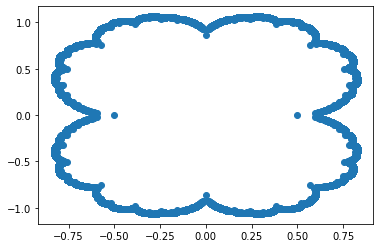

In [5]:
plotPoints(nonEscaping(0.25, 15))

c = i

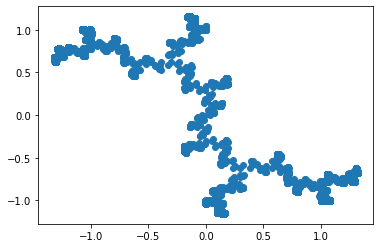

In [6]:
plotPoints(nonEscaping(1j, 10))

c = -0.12+0.74i

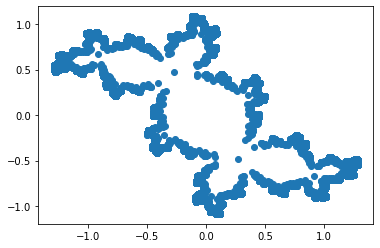

In [7]:
plotPoints(nonEscaping(-0.12+0.74j, 13))

QUESTION 4

In [8]:
def matrix_plot(subs, points):
  #using a [-2, 2]x[-2, 2] square centered around (0, 0)
  results = np.ones((subs, subs))
  delta = 4/subs

  for point in points:
    x_val = point.real
    y_val = point.imag
    x_coord = (x_val + 2)/delta
    y_coord = (y_val + 2)/delta
    #print(x_val, y_val)
    #print(int(x_coord), int(y_coord))
    results[int(x_coord), subs-int(y_coord)] = 0

  #print(results)
  plt.imshow(results)

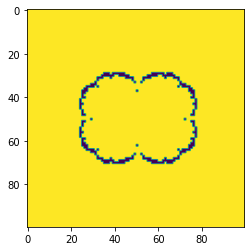

In [9]:
matrix_plot(100, nonEscaping(0.25, 10))

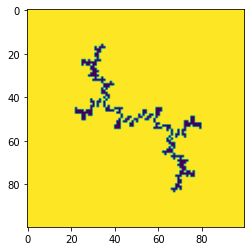

In [10]:
matrix_plot(100, nonEscaping(1j, 10))

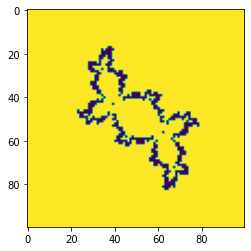

In [11]:
matrix_plot(100, nonEscaping(-0.12+0.74j, 13))

QUESTION 5

In [12]:
def non_attractive_fixed_general(coeffs):
  z = sympy.symbols('z')
  eq = 0
  for i, coeff in enumerate(reversed(coeffs)):
    eq += coeff*z**i
  
  diff_eq = sympy.diff(eq, z)

  solutions = sympy.solve(eq-z)
  non_attractive = []

  for solution in solutions:
    if abs(diff_eq.subs(z, solution)) >= 1:
      non_attractive.append(complex(solution))
  
  return non_attractive

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def nonEscapingGeneral(coeffs, steps):
  solutions = set(non_attractive_fixed_general(coeffs))
  z = sympy.symbols('z')
  eq = 0
  for i, coeff in enumerate(reversed(coeffs)):
    eq += coeff*z**i
  
  for _ in range(steps):
    new_solutions = set()
    for solution in solutions:
      points = sympy.solve(eq-solution)
      for point in points:
        new_solutions.add(complex(point))
    solutions = new_solutions
  
  return(solutions)

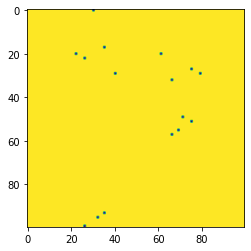

In [21]:
matrix_plot(100, nonEscapingGeneral([1, 2, 1j], 3))